## Part 3.0

In [1]:
from Weidman_Figures import *

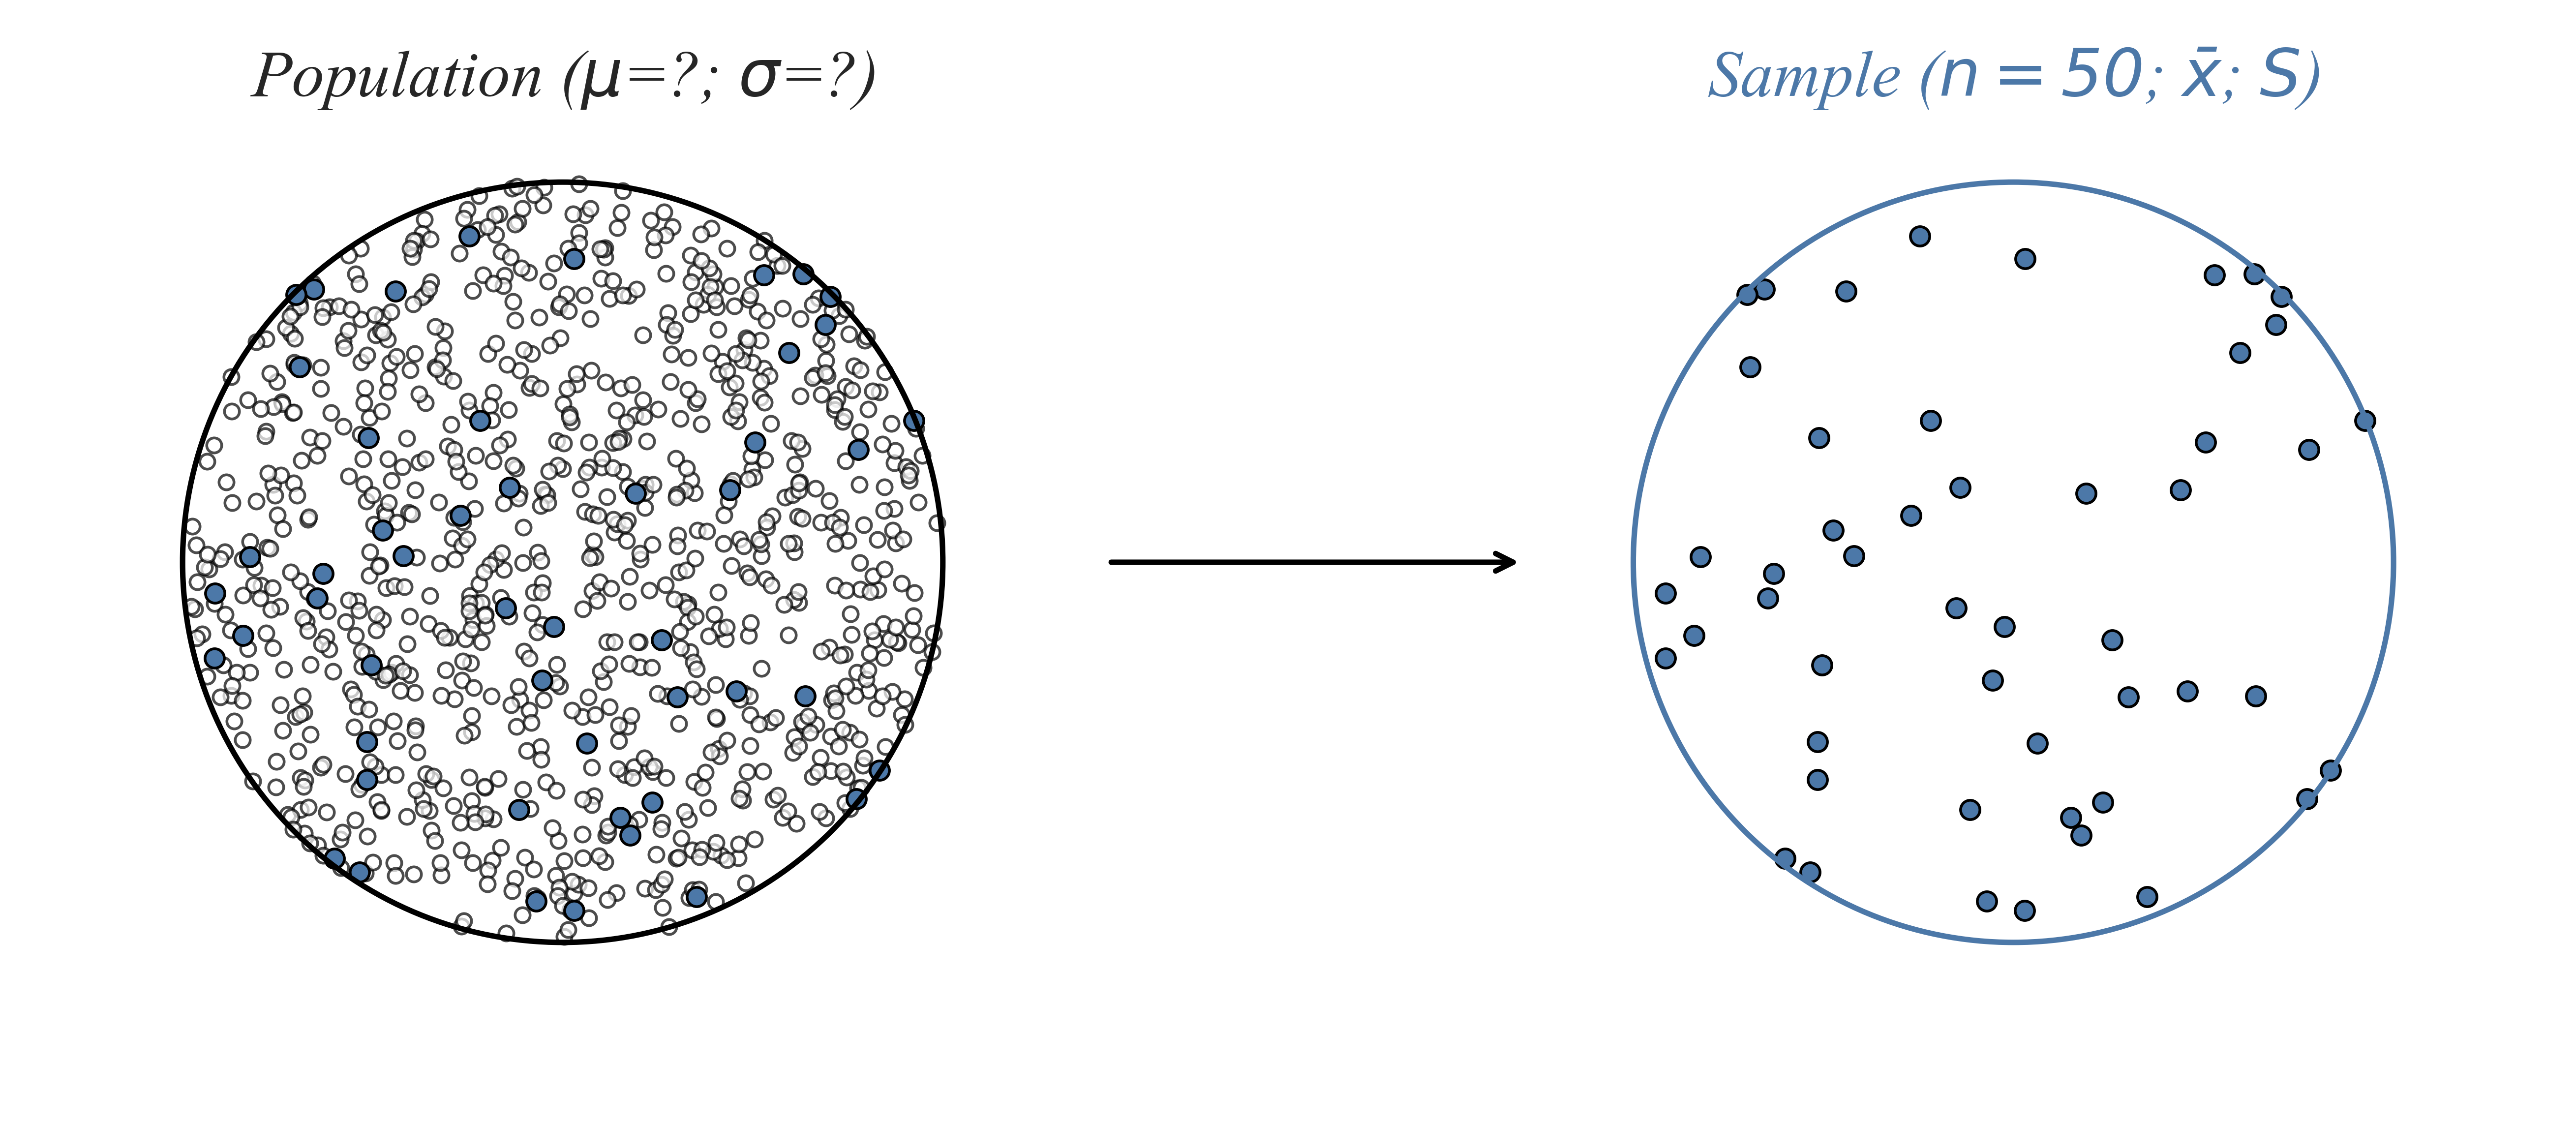

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import random

# Set seed for reproducibility
np.random.seed(42)
random.seed(42)

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Parameters
n_population = 1000  # Generate more points than needed
circle_radius = 35
center_x, center_y = 50, 50

# Generate random points in a circular pattern
theta = np.random.uniform(0, 2*np.pi, n_population)
r = circle_radius * np.sqrt(np.random.uniform(0, 1, n_population))  # Square root for uniform density
population_x = center_x + r * np.cos(theta)
population_y = center_y + r * np.sin(theta)

# Keep only points inside the circle (this is redundant with our generation method but ensures clarity)
distances = np.sqrt((population_x - center_x)**2 + (population_y - center_y)**2)
inside_circle = distances <= circle_radius
population_x = population_x[inside_circle]
population_y = population_y[inside_circle]

# Recalculate population size after filtering
n_population = len(population_x)

# Sample size
n_sample = 50

# Randomly select indices for sample
sample_indices = random.sample(range(n_population), n_sample)
is_in_sample = np.zeros(n_population, dtype=bool)
is_in_sample[sample_indices] = True

# Plot 1: Population with sampled points highlighted
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 100)
ax1.set_aspect('equal')

# Plot population points
ax1.scatter(population_x[~is_in_sample], population_y[~is_in_sample], 
           s=30, alpha=0.7, color='white', edgecolor='black')

# Highlight sample points within population
ax1.scatter(population_x[is_in_sample], population_y[is_in_sample], 
           s=50, alpha=1.0, color='#4C78A8', edgecolor='black')

# Draw a boundary around the population
population_circle = Circle(xy=(center_x, center_y), radius=circle_radius, 
                          edgecolor='black', fc='none', lw=2, ls='-')
ax1.add_patch(population_circle)
ax1.text(center_x, center_y + circle_radius + 8, "Population ($\\mu$=?; $\\sigma$=?)", ha='center', fontsize=24)

# Plot 2: Just the sample
ax2.set_xlim(0, 100)
ax2.set_ylim(0, 100)
ax2.set_aspect('equal')

# Plot the sample points (same coordinates and color as in population)
ax2.scatter(population_x[is_in_sample], population_y[is_in_sample], 
           s=50, alpha=1.0, color='#4C78A8', edgecolor='black')

# Draw sample boundary
sample_circle = Circle(xy=(center_x, center_y), radius=circle_radius,
                      edgecolor='#4C78A8', fc='none', lw=2, ls='-')
ax2.add_patch(sample_circle)
ax2.text(center_x, center_y + circle_radius + 8, "Sample ($n=50$; $\\bar{x}$; $S$)", 
         ha='center', fontsize=24, color='#4C78A8')

# Remove axes from both plots
for ax in [ax1, ax2]:
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

# Add arrow connecting population to sample
plt.annotate('', xy=(0.05, 0.5), xytext=(1, 0.5), 
             xycoords=ax2.transAxes, textcoords=ax1.transAxes,
             arrowprops=dict(arrowstyle='->', color='black', lw=2))

plt.tight_layout()
plt.savefig('Part_3_1/i/sample.png')

## Example | Class Ages

In [2]:
survey = pd.read_csv('Part_0/Part_0_Survey.csv')

In [5]:
survey['What is your age?'].unique()

array(['20', '19', '21', '18', '22', 'Senior'], dtype=object)

In [11]:
survey['age'] = pd.to_numeric(survey['What is your age?'], errors='coerce').dropna()

<Axes: >

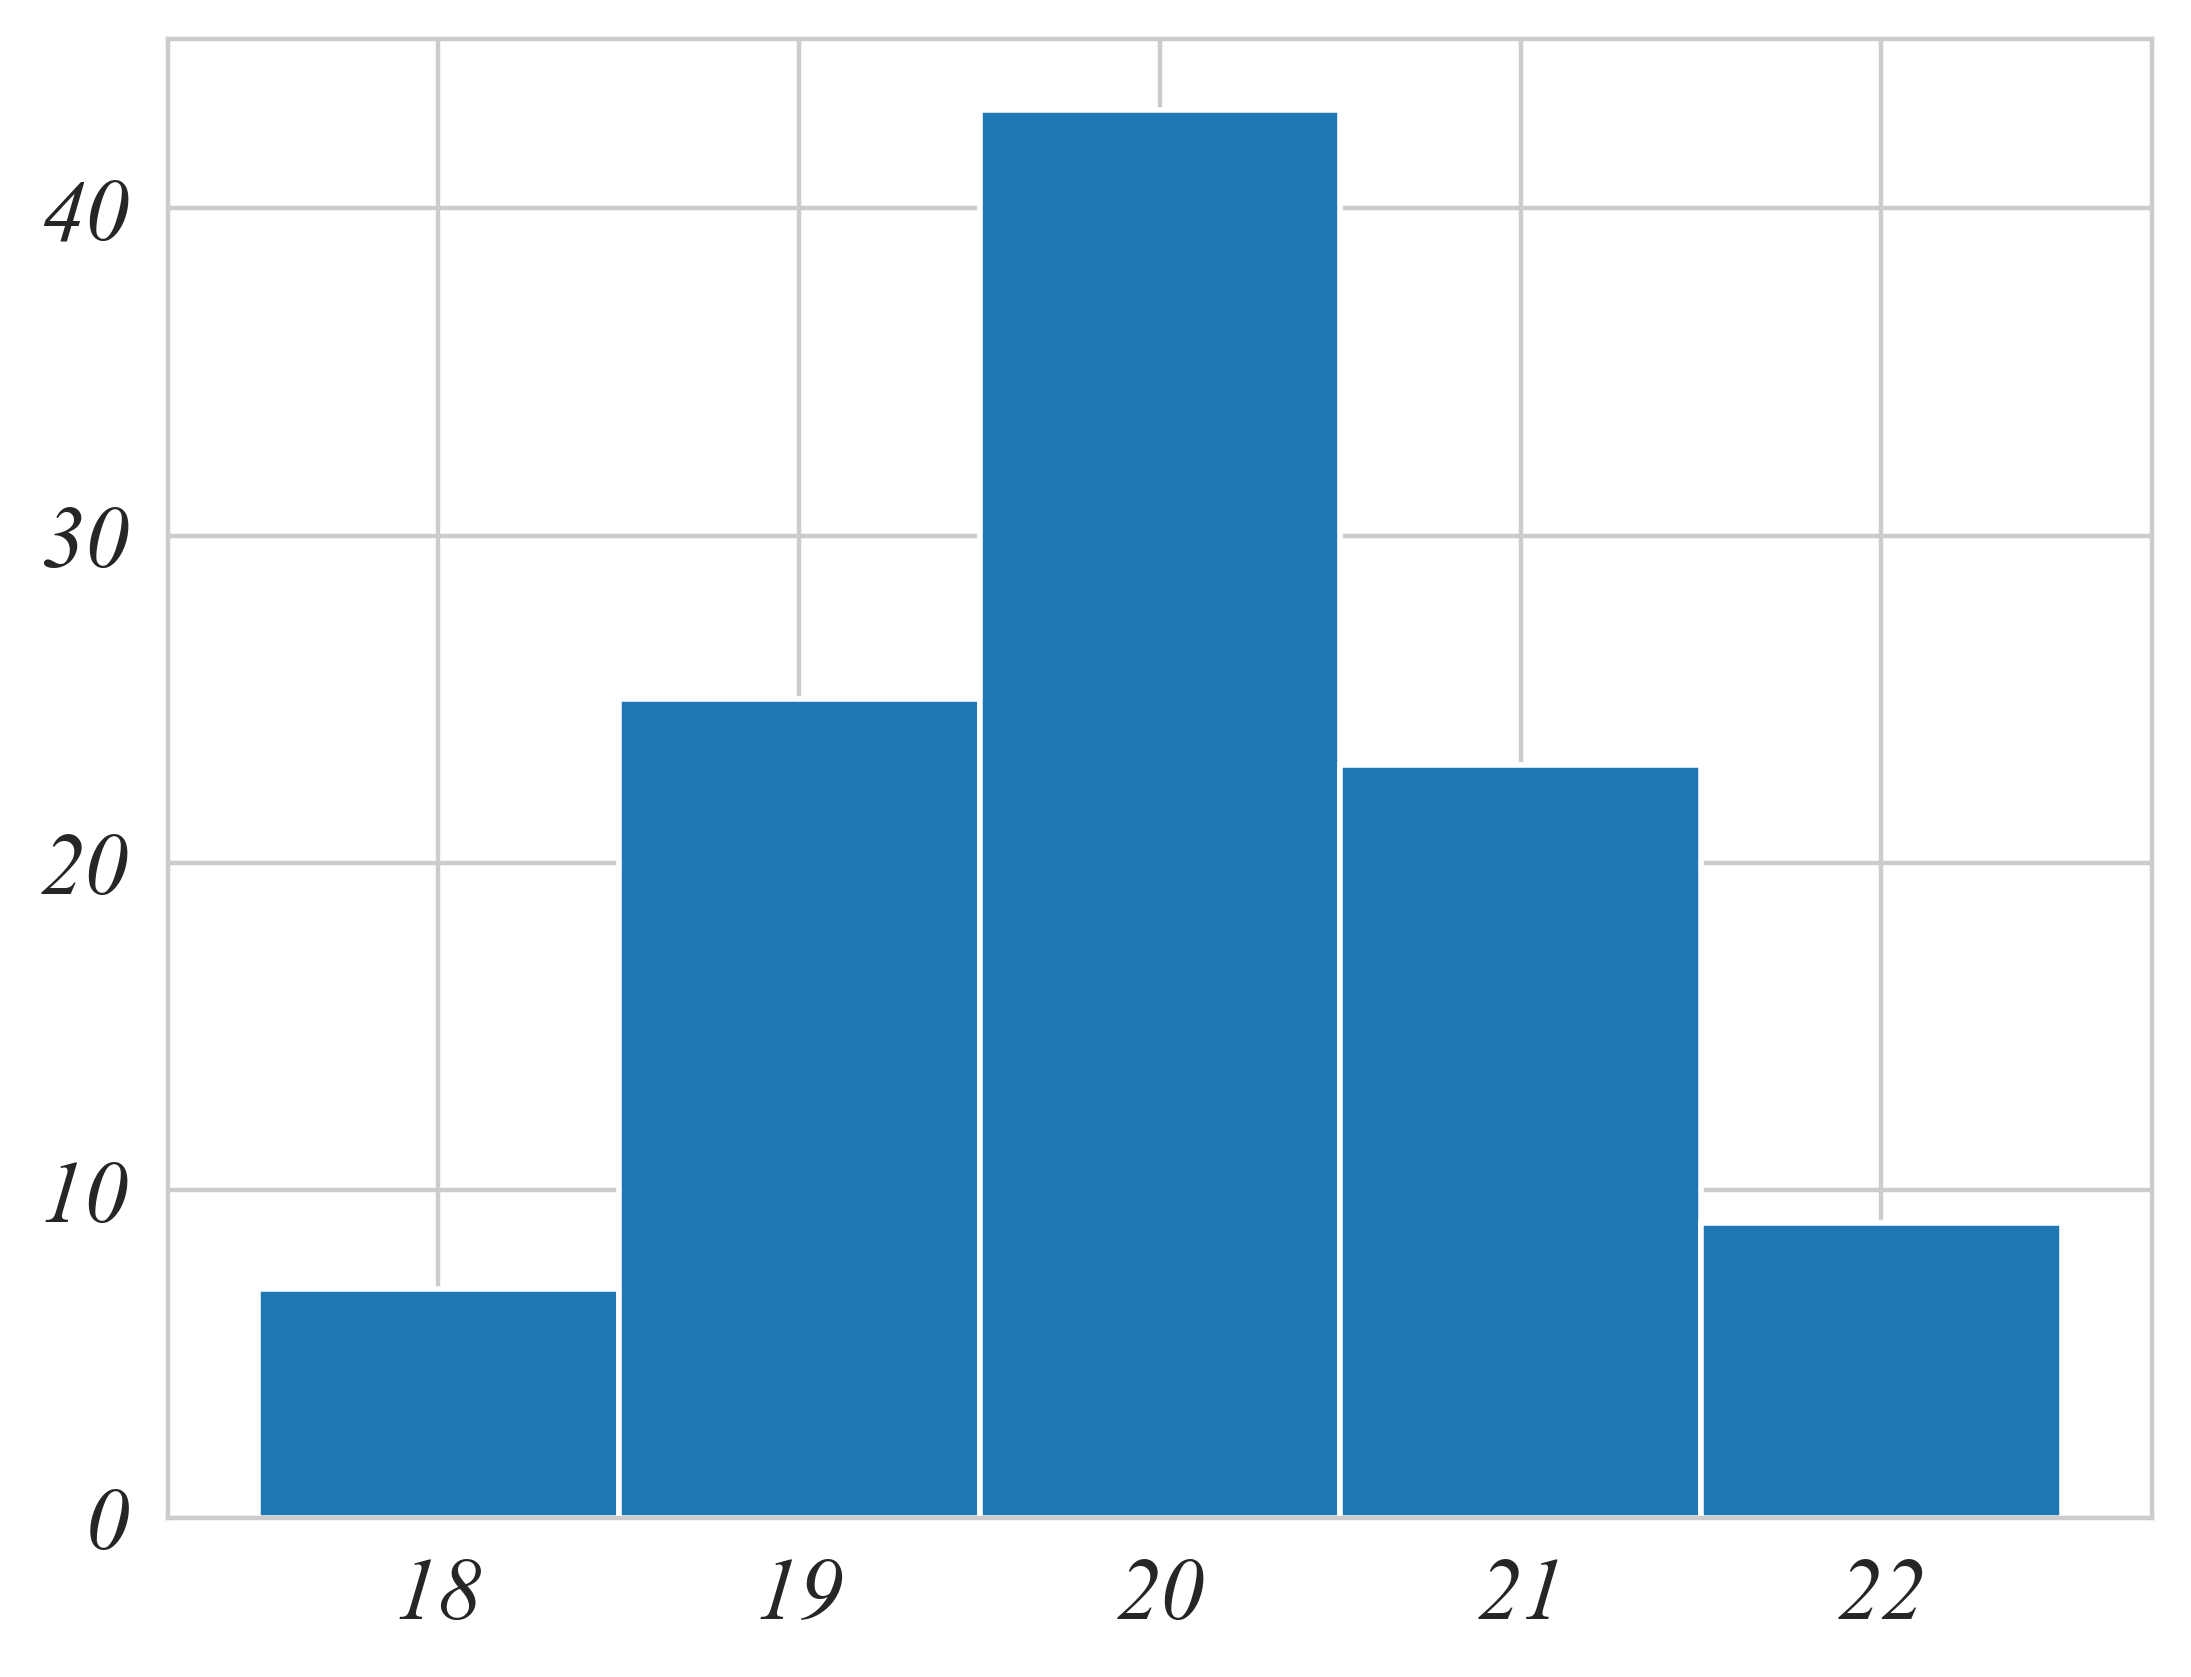

In [22]:
survey['age'].hist(bins=[17.5,18.5,19.5,20.5,21.5,22.5])

In [23]:
survey['age'].mode()

0    20.0
Name: age, dtype: float64

In [24]:
survey['age'].median()

20.0

In [25]:
survey['age'].mean()

20.018691588785046

## Example | Tennis Locations

In [26]:
# locations of my tennis shots
tennis = pd.DataFrame({'Court_Location': [0, 5, 10, 10, 15, 15, 15, 20, 20, 25, 30]})

<Axes: >

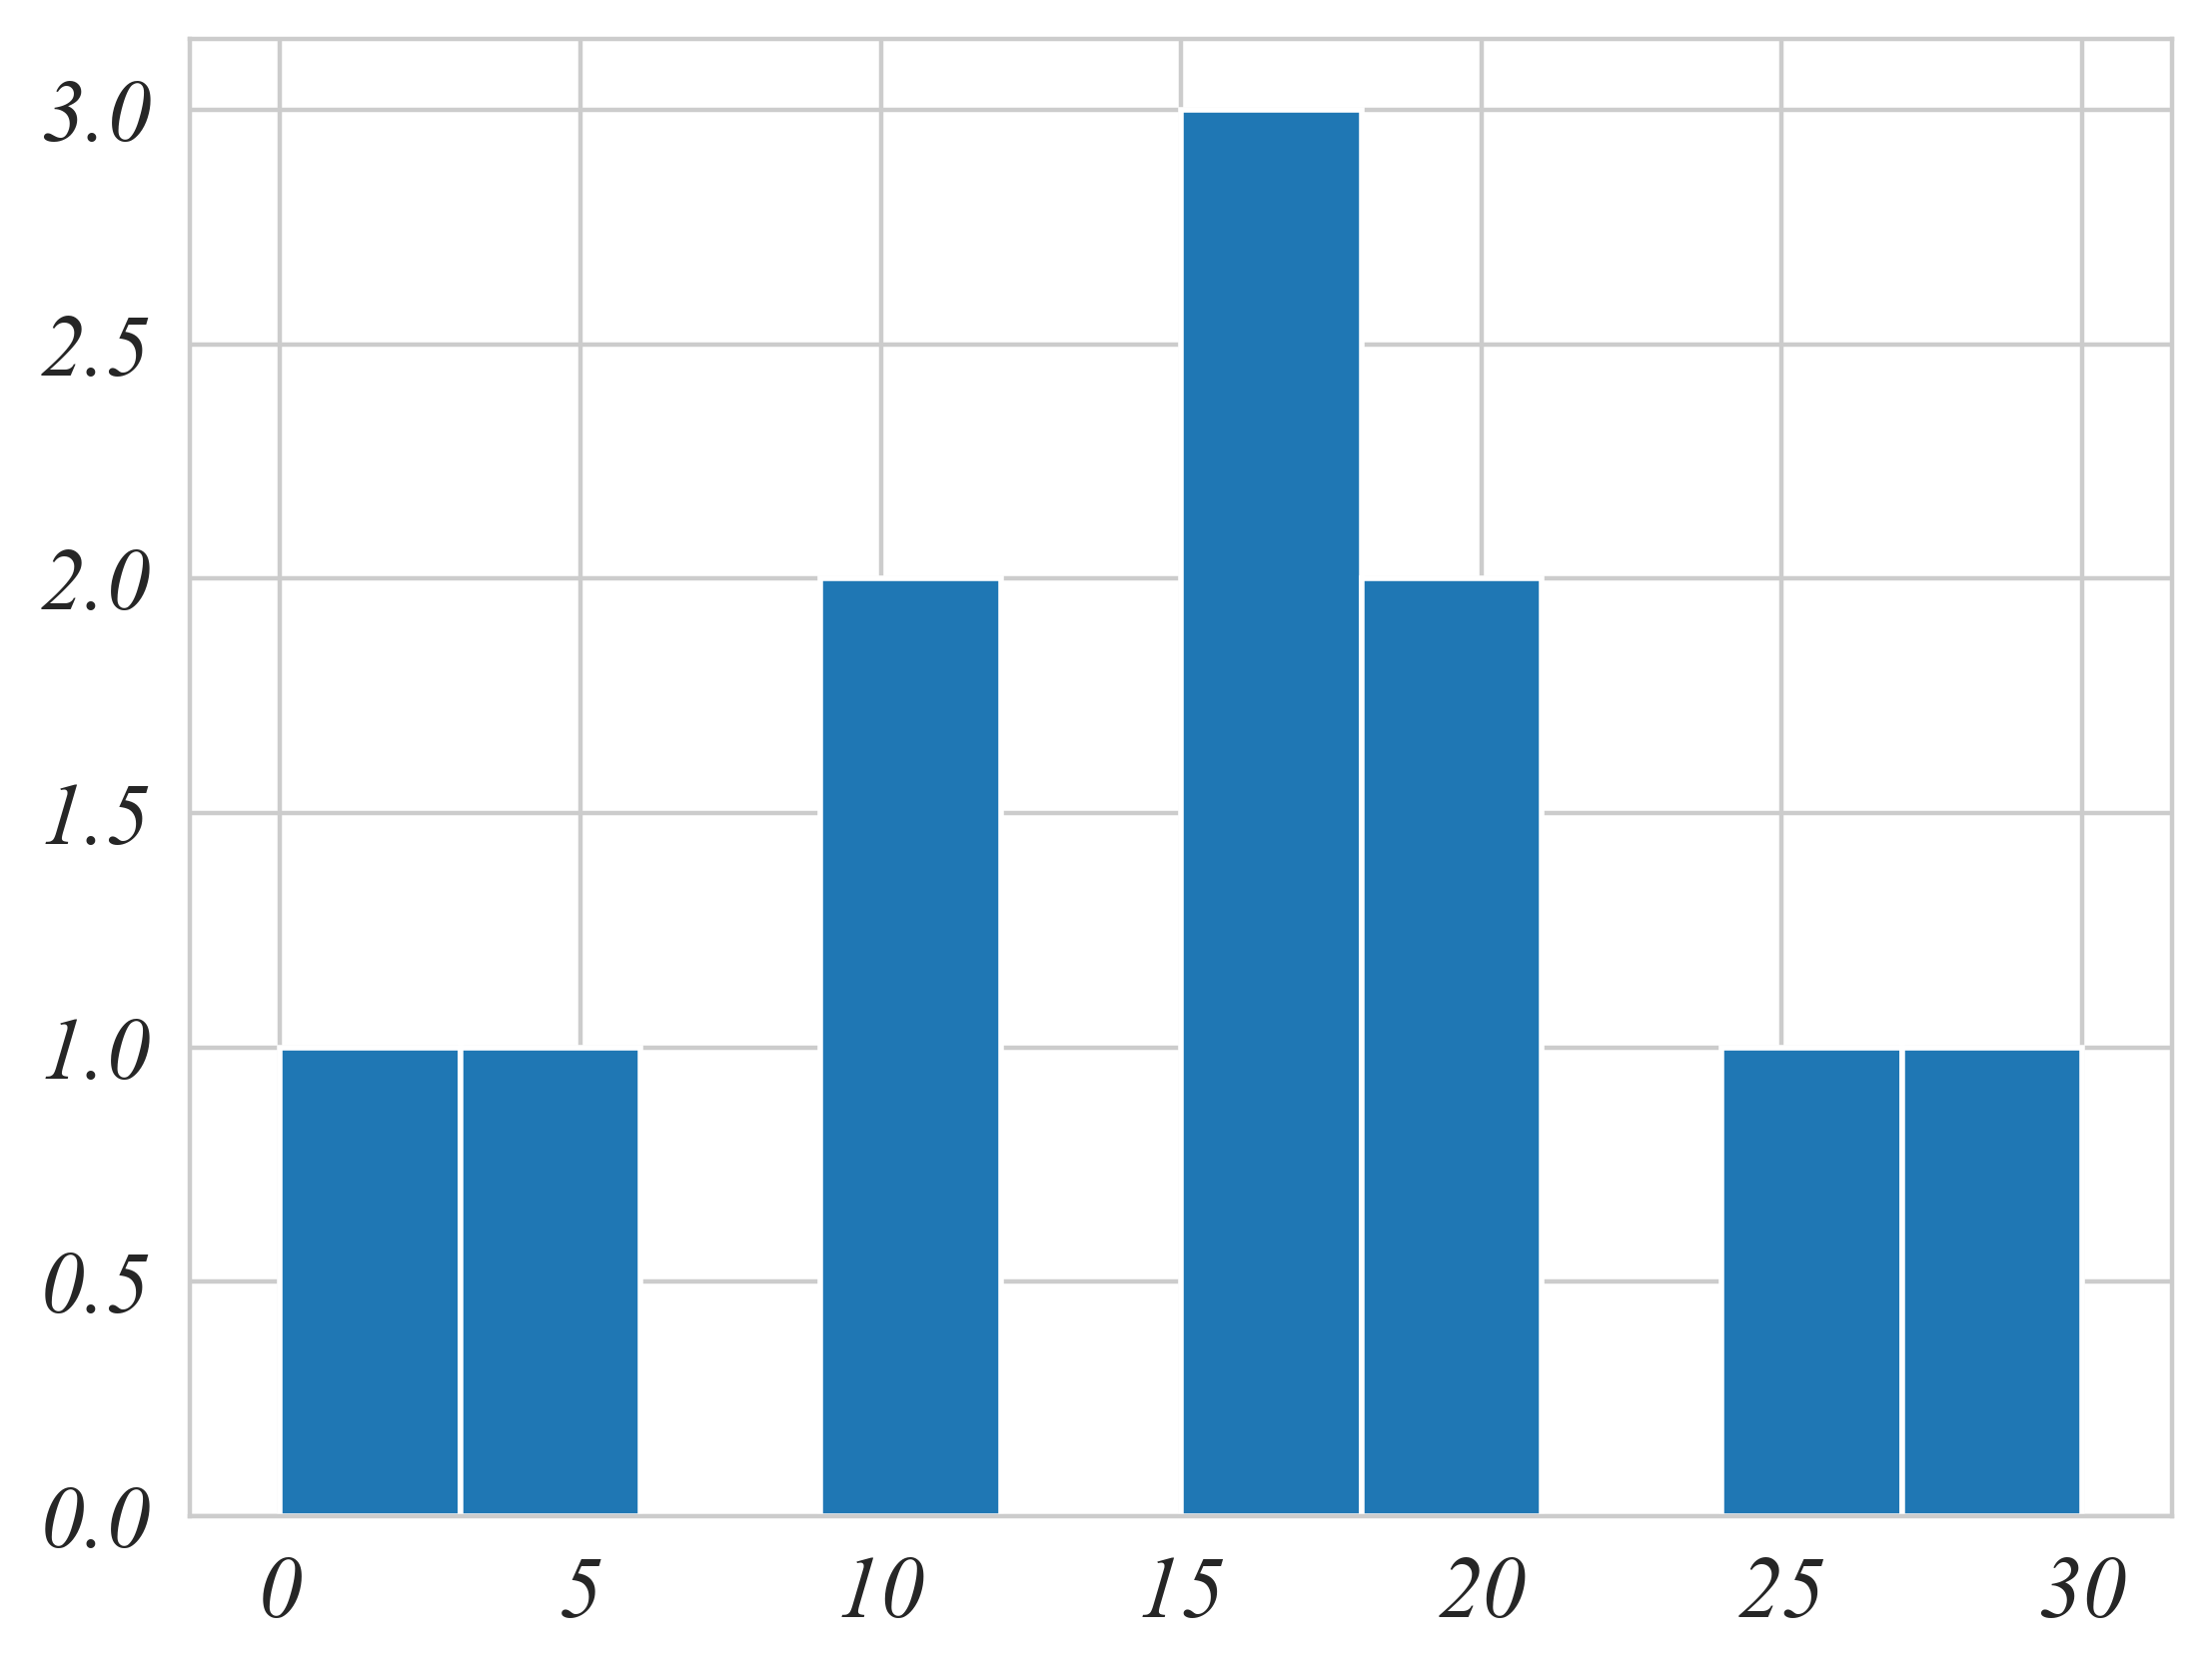

In [32]:
tennis['Court_Location'].hist()

In [33]:
tennis['Distance_Run'] = tennis['Court_Location'] - tennis['Court_Location'].mean()

In [34]:
tennis['Distance_Run']

0    -15.0
1    -10.0
2     -5.0
3     -5.0
4      0.0
5      0.0
6      0.0
7      5.0
8      5.0
9     10.0
10    15.0
Name: Distance_Run, dtype: float64


Theoretical Moments:

Normal Distribution (μ=0, σ=1):
Expected Value: 0
Variance: 1

Exponential Distribution (λ=1):
Expected Value: 1
Variance: 1

Uniform Distribution (0,1):
Expected Value: 0.5
Variance: 0.08333333333333333

Binomial Distribution (n=20, p=0.3):
Expected Value: 6.0
Variance: 4.199999999999999

Poisson Distribution (λ=3):
Expected Value: 3
Variance: 3

Chi-Square Distribution (df=3):
Expected Value: 3
Variance: 6


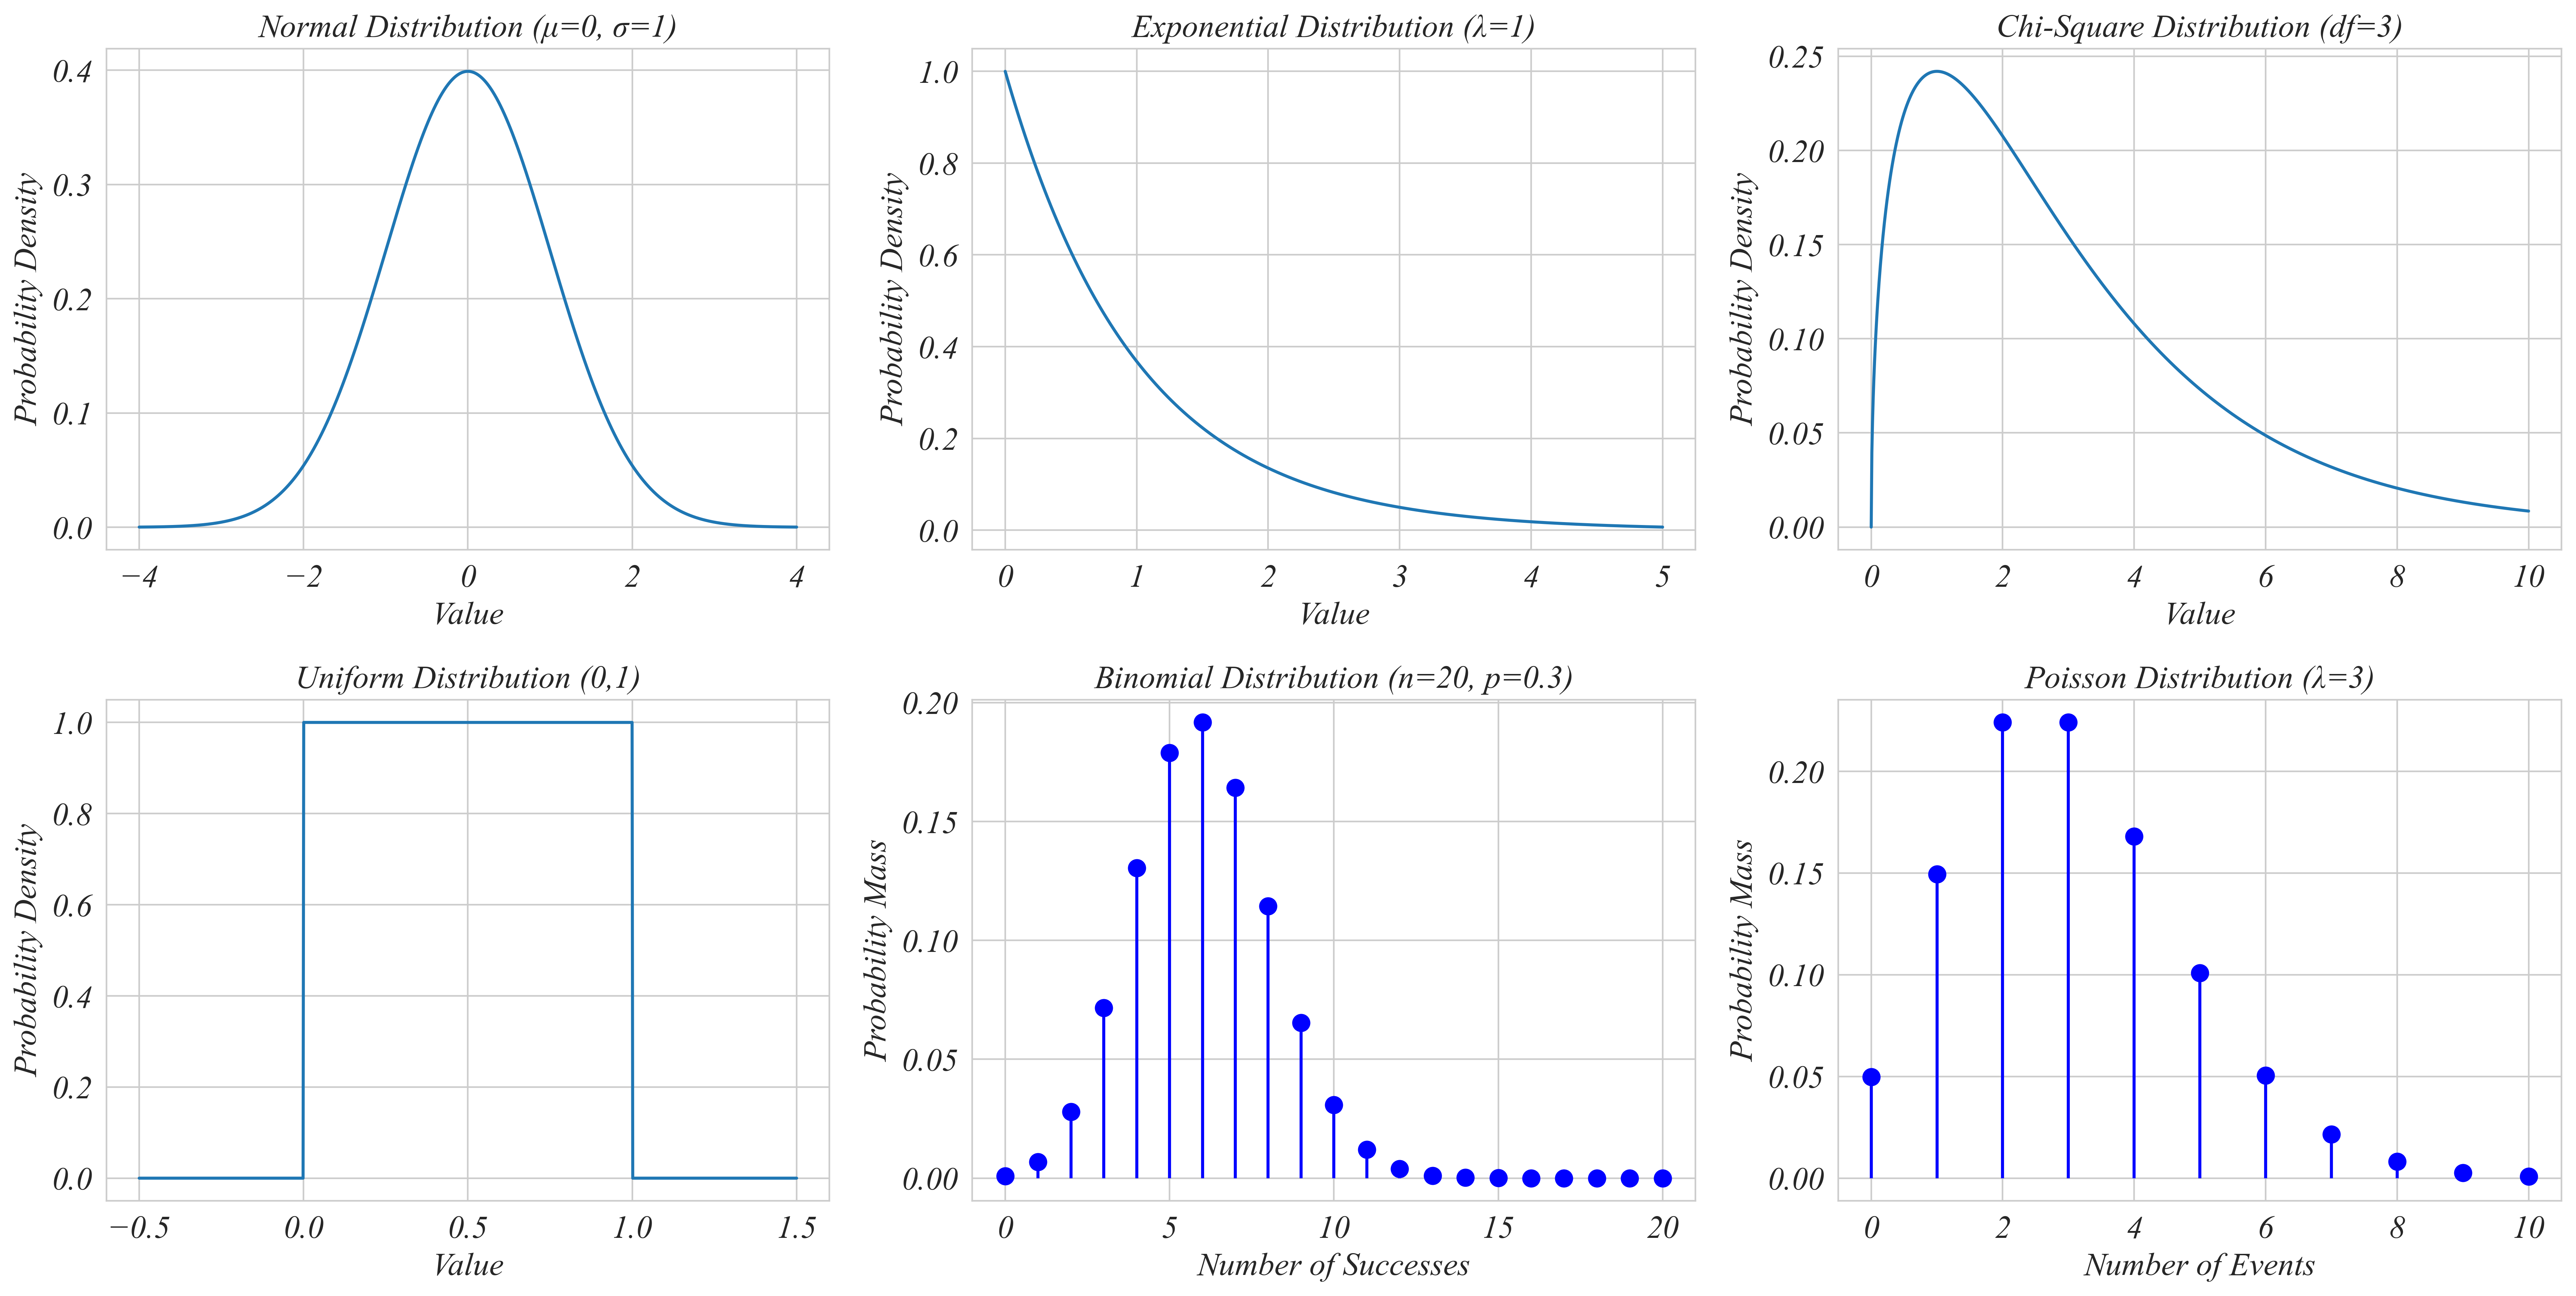

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Normal Distribution
x_normal = np.linspace(-4, 4, 1000)
y_normal = stats.norm.pdf(x_normal, loc=0, scale=1)
axes[0,0].plot(x_normal, y_normal)
axes[0,0].set_title('Normal Distribution (μ=0, σ=1)')
axes[0,0].set_xlabel('Value')
axes[0,0].set_ylabel('Probability Density')

# Exponential Distribution
x_exp = np.linspace(0, 5, 1000)
y_exp = stats.expon.pdf(x_exp, scale=1)
axes[0,1].plot(x_exp, y_exp)
axes[0,1].set_title('Exponential Distribution (λ=1)')
axes[0,1].set_xlabel('Value')
axes[0,1].set_ylabel('Probability Density')

# Uniform Distribution
x_uniform = np.linspace(-0.5, 1.5, 1000)
y_uniform = stats.uniform.pdf(x_uniform, loc=0, scale=1)
axes[1,0].plot(x_uniform, y_uniform)
axes[1,0].set_title('Uniform Distribution (0,1)')
axes[1,0].set_xlabel('Value')
axes[1,0].set_ylabel('Probability Density')

# Binomial Distribution
x_binom = np.arange(0, 21)
y_binom = stats.binom.pmf(x_binom, n=20, p=0.3)
axes[1,1].vlines(x_binom, 0, y_binom, colors='blue')
axes[1,1].plot(x_binom, y_binom, 'bo', ms=8)
axes[1,1].set_title('Binomial Distribution (n=20, p=0.3)')
axes[1,1].set_xlabel('Number of Successes')
axes[1,1].set_ylabel('Probability Mass')

# Poisson Distribution
x_poisson = np.arange(0, 11)
y_poisson = stats.poisson.pmf(x_poisson, mu=3)
axes[1,2].vlines(x_poisson, 0, y_poisson, colors='blue')
axes[1,2].plot(x_poisson, y_poisson, 'bo', ms=8)
axes[1,2].set_title('Poisson Distribution (λ=3)')
axes[1,2].set_xlabel('Number of Events')
axes[1,2].set_ylabel('Probability Mass')

# Chi-Square Distribution
x_chi2 = np.linspace(0, 10, 1000)
y_chi2 = stats.chi2.pdf(x_chi2, df=3)
axes[0,2].plot(x_chi2, y_chi2)
axes[0,2].set_title('Chi-Square Distribution (df=3)')
axes[0,2].set_xlabel('Value')
axes[0,2].set_ylabel('Probability Density')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Print the expected value and variance for each distribution
print("\nTheoretical Moments:")
print("\nNormal Distribution (μ=0, σ=1):")
print(f"Expected Value: {0}")
print(f"Variance: {1}")

print("\nExponential Distribution (λ=1):")
print(f"Expected Value: {1}")
print(f"Variance: {1}")

print("\nUniform Distribution (0,1):")
print(f"Expected Value: {0.5}")
print(f"Variance: {1/12}")

print("\nBinomial Distribution (n=20, p=0.3):")
print(f"Expected Value: {20 * 0.3}")
print(f"Variance: {20 * 0.3 * 0.7}")

print("\nPoisson Distribution (λ=3):")
print(f"Expected Value: {3}")
print(f"Variance: {3}")

print("\nChi-Square Distribution (df=3):")
print(f"Expected Value: {3}")
print(f"Variance: {6}")

plt.savefig('Part_3_1/i/distributions.png')


Summary Statistics:

Normal Distribution:
Mean: 0.019
Std Dev: 0.979

Exponential Distribution:
Mean: 1.008
Std Dev: 1.002

Uniform Distribution:
Mean: 0.494
Std Dev: 0.289

Binomial Distribution:
Mean: 5.939
Std Dev: 2.042

Poisson Distribution:
Mean: 2.939
Std Dev: 1.589

Chi-Square Distribution:
Mean: 2.983
Std Dev: 2.467


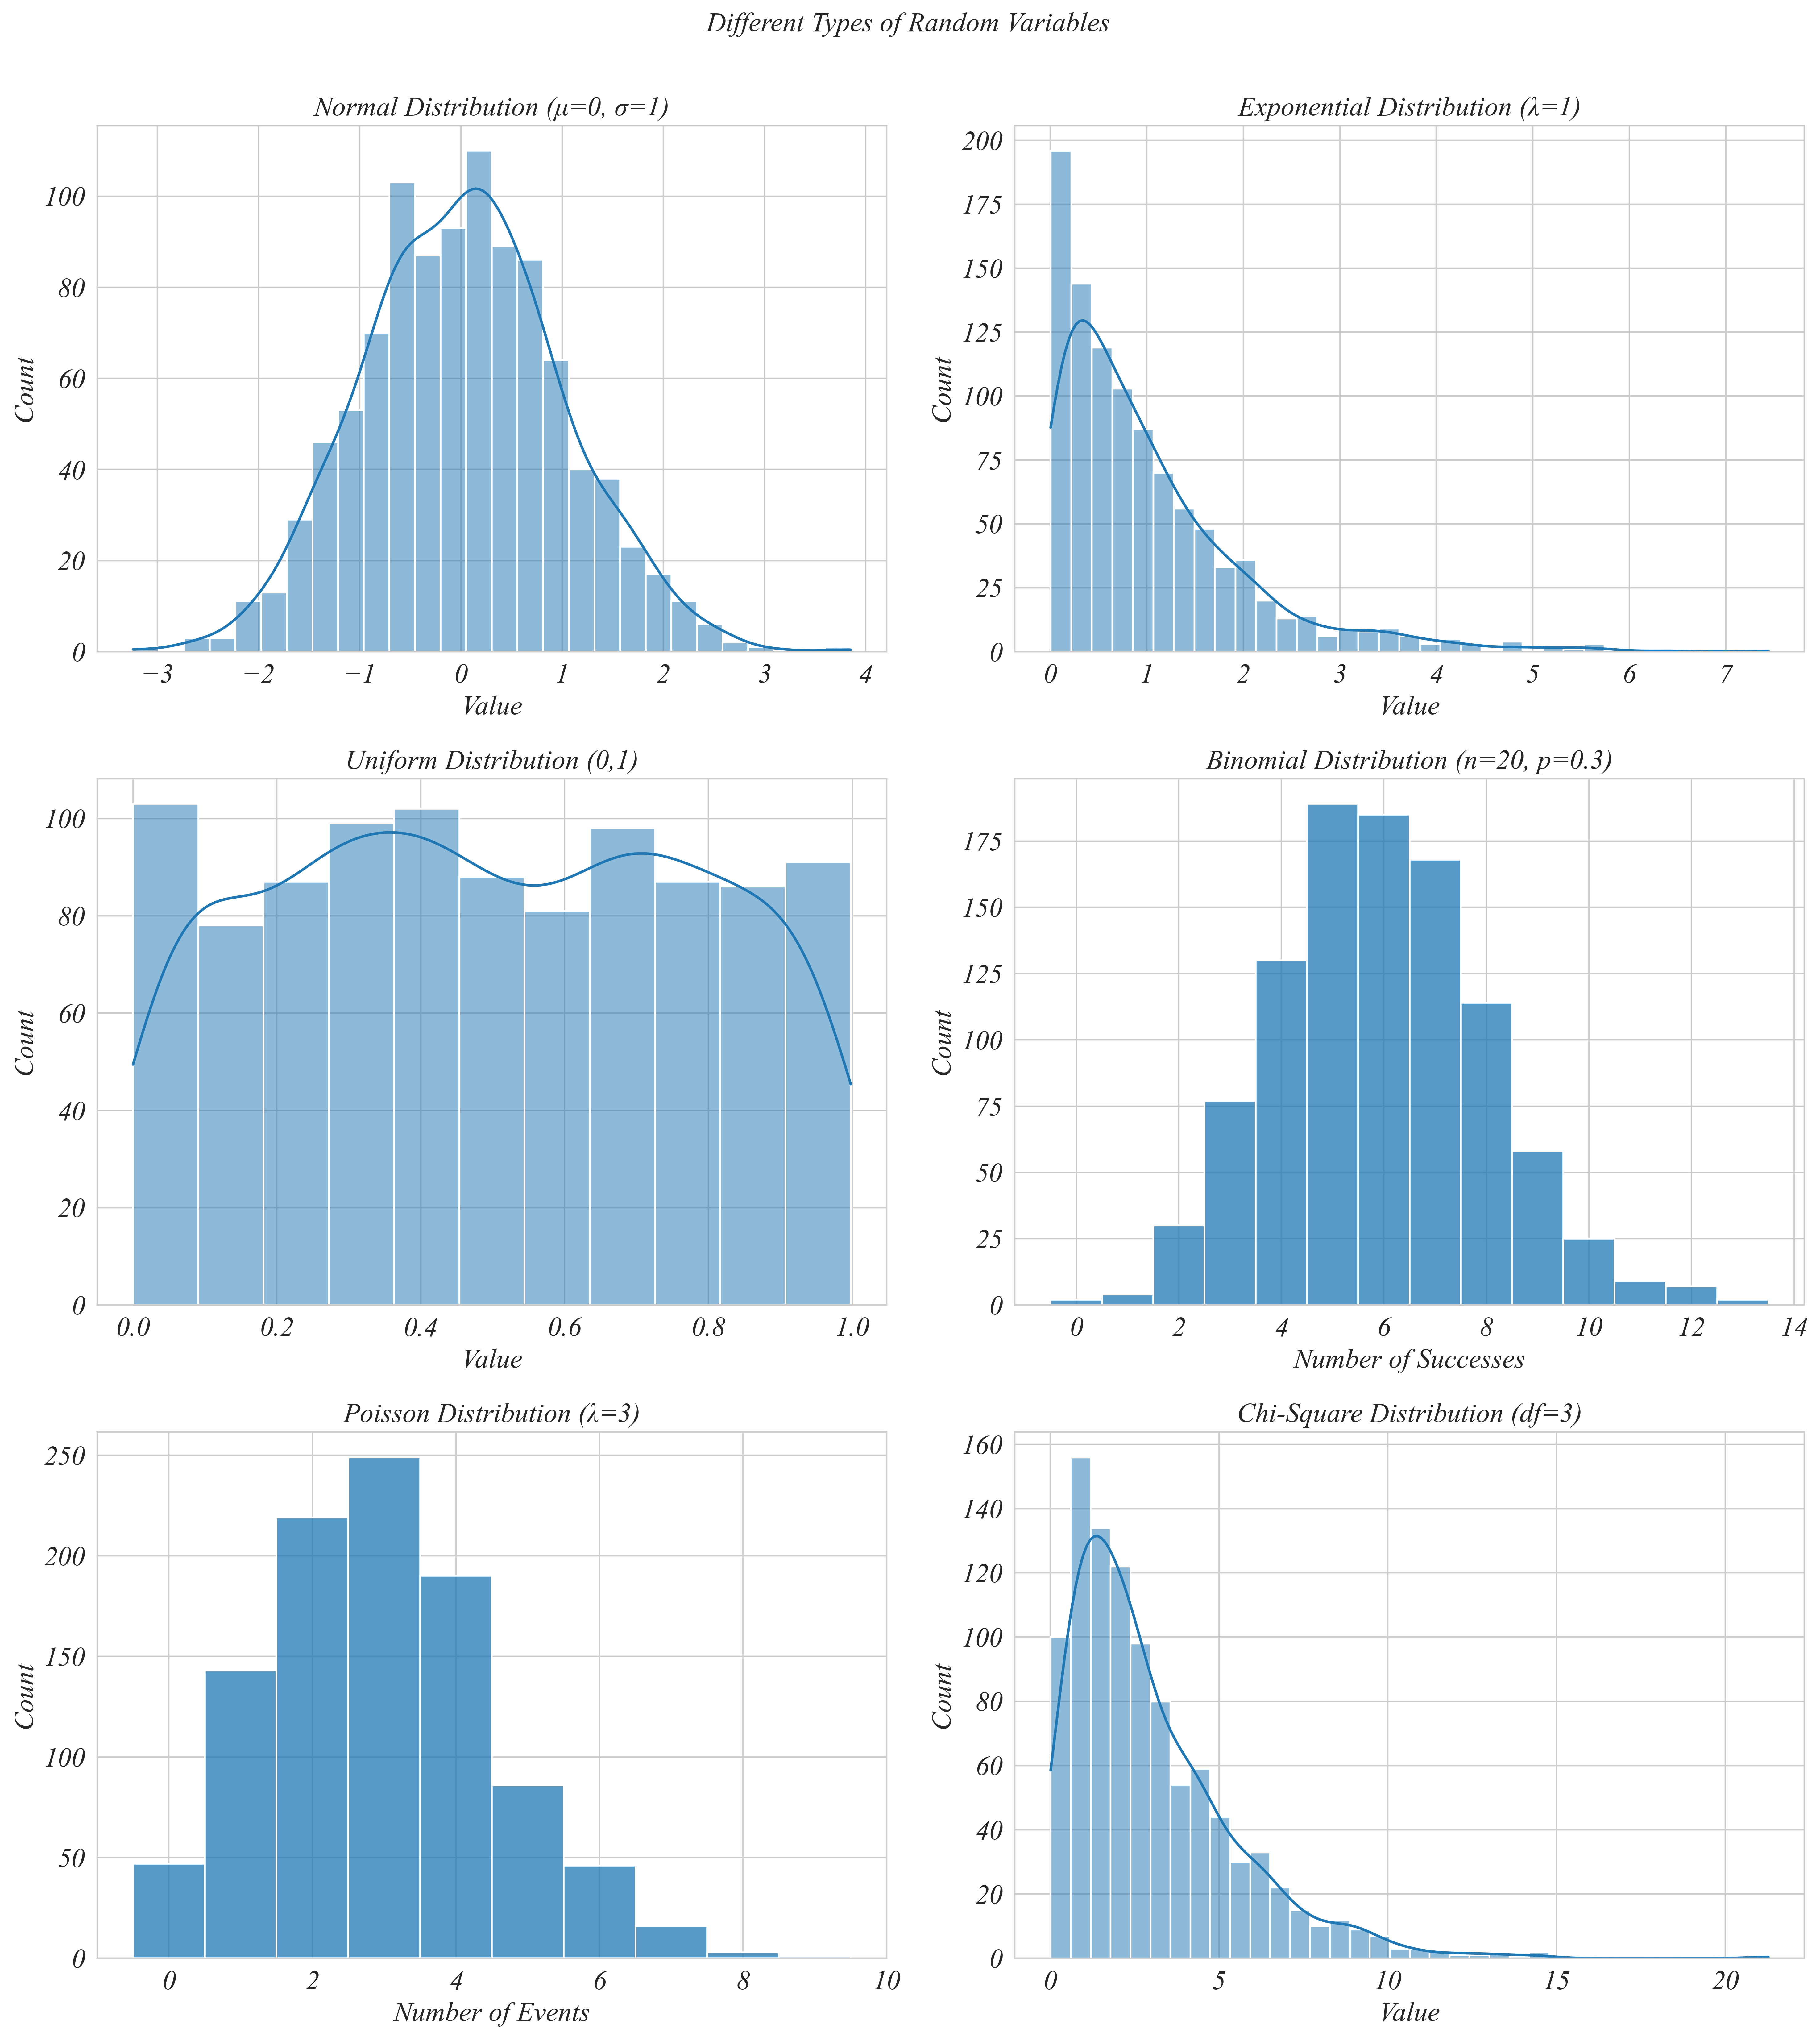

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Different Types of Random Variables', fontsize=16, y=0.95)

# Normal Distribution
normal_data = np.random.normal(loc=0, scale=1, size=1000)
sns.histplot(normal_data, kde=True, ax=axes[0,0])
axes[0,0].set_title('Normal Distribution (μ=0, σ=1)')
axes[0,0].set_xlabel('Value')
axes[0,0].set_ylabel('Count')

# Exponential Distribution
exp_data = np.random.exponential(scale=1, size=1000)
sns.histplot(exp_data, kde=True, ax=axes[0,1])
axes[0,1].set_title('Exponential Distribution (λ=1)')
axes[0,1].set_xlabel('Value')
axes[0,1].set_ylabel('Count')

# Uniform Distribution
uniform_data = np.random.uniform(low=0, high=1, size=1000)
sns.histplot(uniform_data, kde=True, ax=axes[1,0])
axes[1,0].set_title('Uniform Distribution (0,1)')
axes[1,0].set_xlabel('Value')
axes[1,0].set_ylabel('Count')

# Binomial Distribution
binomial_data = np.random.binomial(n=20, p=0.3, size=1000)
sns.histplot(binomial_data, discrete=True, ax=axes[1,1])
axes[1,1].set_title('Binomial Distribution (n=20, p=0.3)')
axes[1,1].set_xlabel('Number of Successes')
axes[1,1].set_ylabel('Count')

# Poisson Distribution
poisson_data = np.random.poisson(lam=3, size=1000)
sns.histplot(poisson_data, discrete=True, ax=axes[2,0])
axes[2,0].set_title('Poisson Distribution (λ=3)')
axes[2,0].set_xlabel('Number of Events')
axes[2,0].set_ylabel('Count')

# Chi-Square Distribution
chi_square_data = np.random.chisquare(df=3, size=1000)
sns.histplot(chi_square_data, kde=True, ax=axes[2,1])
axes[2,1].set_title('Chi-Square Distribution (df=3)')
axes[2,1].set_xlabel('Value')
axes[2,1].set_ylabel('Count')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Print some summary statistics for each distribution
print("\nSummary Statistics:")
print("\nNormal Distribution:")
print(f"Mean: {np.mean(normal_data):.3f}")
print(f"Std Dev: {np.std(normal_data):.3f}")

print("\nExponential Distribution:")
print(f"Mean: {np.mean(exp_data):.3f}")
print(f"Std Dev: {np.std(exp_data):.3f}")

print("\nUniform Distribution:")
print(f"Mean: {np.mean(uniform_data):.3f}")
print(f"Std Dev: {np.std(uniform_data):.3f}")

print("\nBinomial Distribution:")
print(f"Mean: {np.mean(binomial_data):.3f}")
print(f"Std Dev: {np.std(binomial_data):.3f}")

print("\nPoisson Distribution:")
print(f"Mean: {np.mean(poisson_data):.3f}")
print(f"Std Dev: {np.std(poisson_data):.3f}")

print("\nChi-Square Distribution:")
print(f"Mean: {np.mean(chi_square_data):.3f}")
print(f"Std Dev: {np.std(chi_square_data):.3f}")

In [47]:
import numpy as np

# Generate 10 inter-arrival times (in minutes) with mean of 15 minutes
interarrival_times = np.random.exponential(scale=15, size=10)

# Convert to actual arrival times (cumulative sum)
arrival_times = np.cumsum(interarrival_times)

print("Inter-arrival times (minutes):", interarrival_times.round(1))
print("\nArrival times (minutes since start):", arrival_times.round(1))

Inter-arrival times (minutes): [22.5 14.7  7.9  4.4 29.5 18.1 11.9 14.1  1.4  9.6]

Arrival times (minutes since start): [ 22.5  37.2  45.1  49.5  79.   97.1 109.  123.1 124.5 134.1]


Expected wait time: 7.5 minutes
P(wait > 20 min): 0.264
P(5 < wait < 15 min): 0.349

Probability of waiting more than:
 5 minutes: 0.717
10 minutes: 0.513
15 minutes: 0.368
20 minutes: 0.264
30 minutes: 0.135


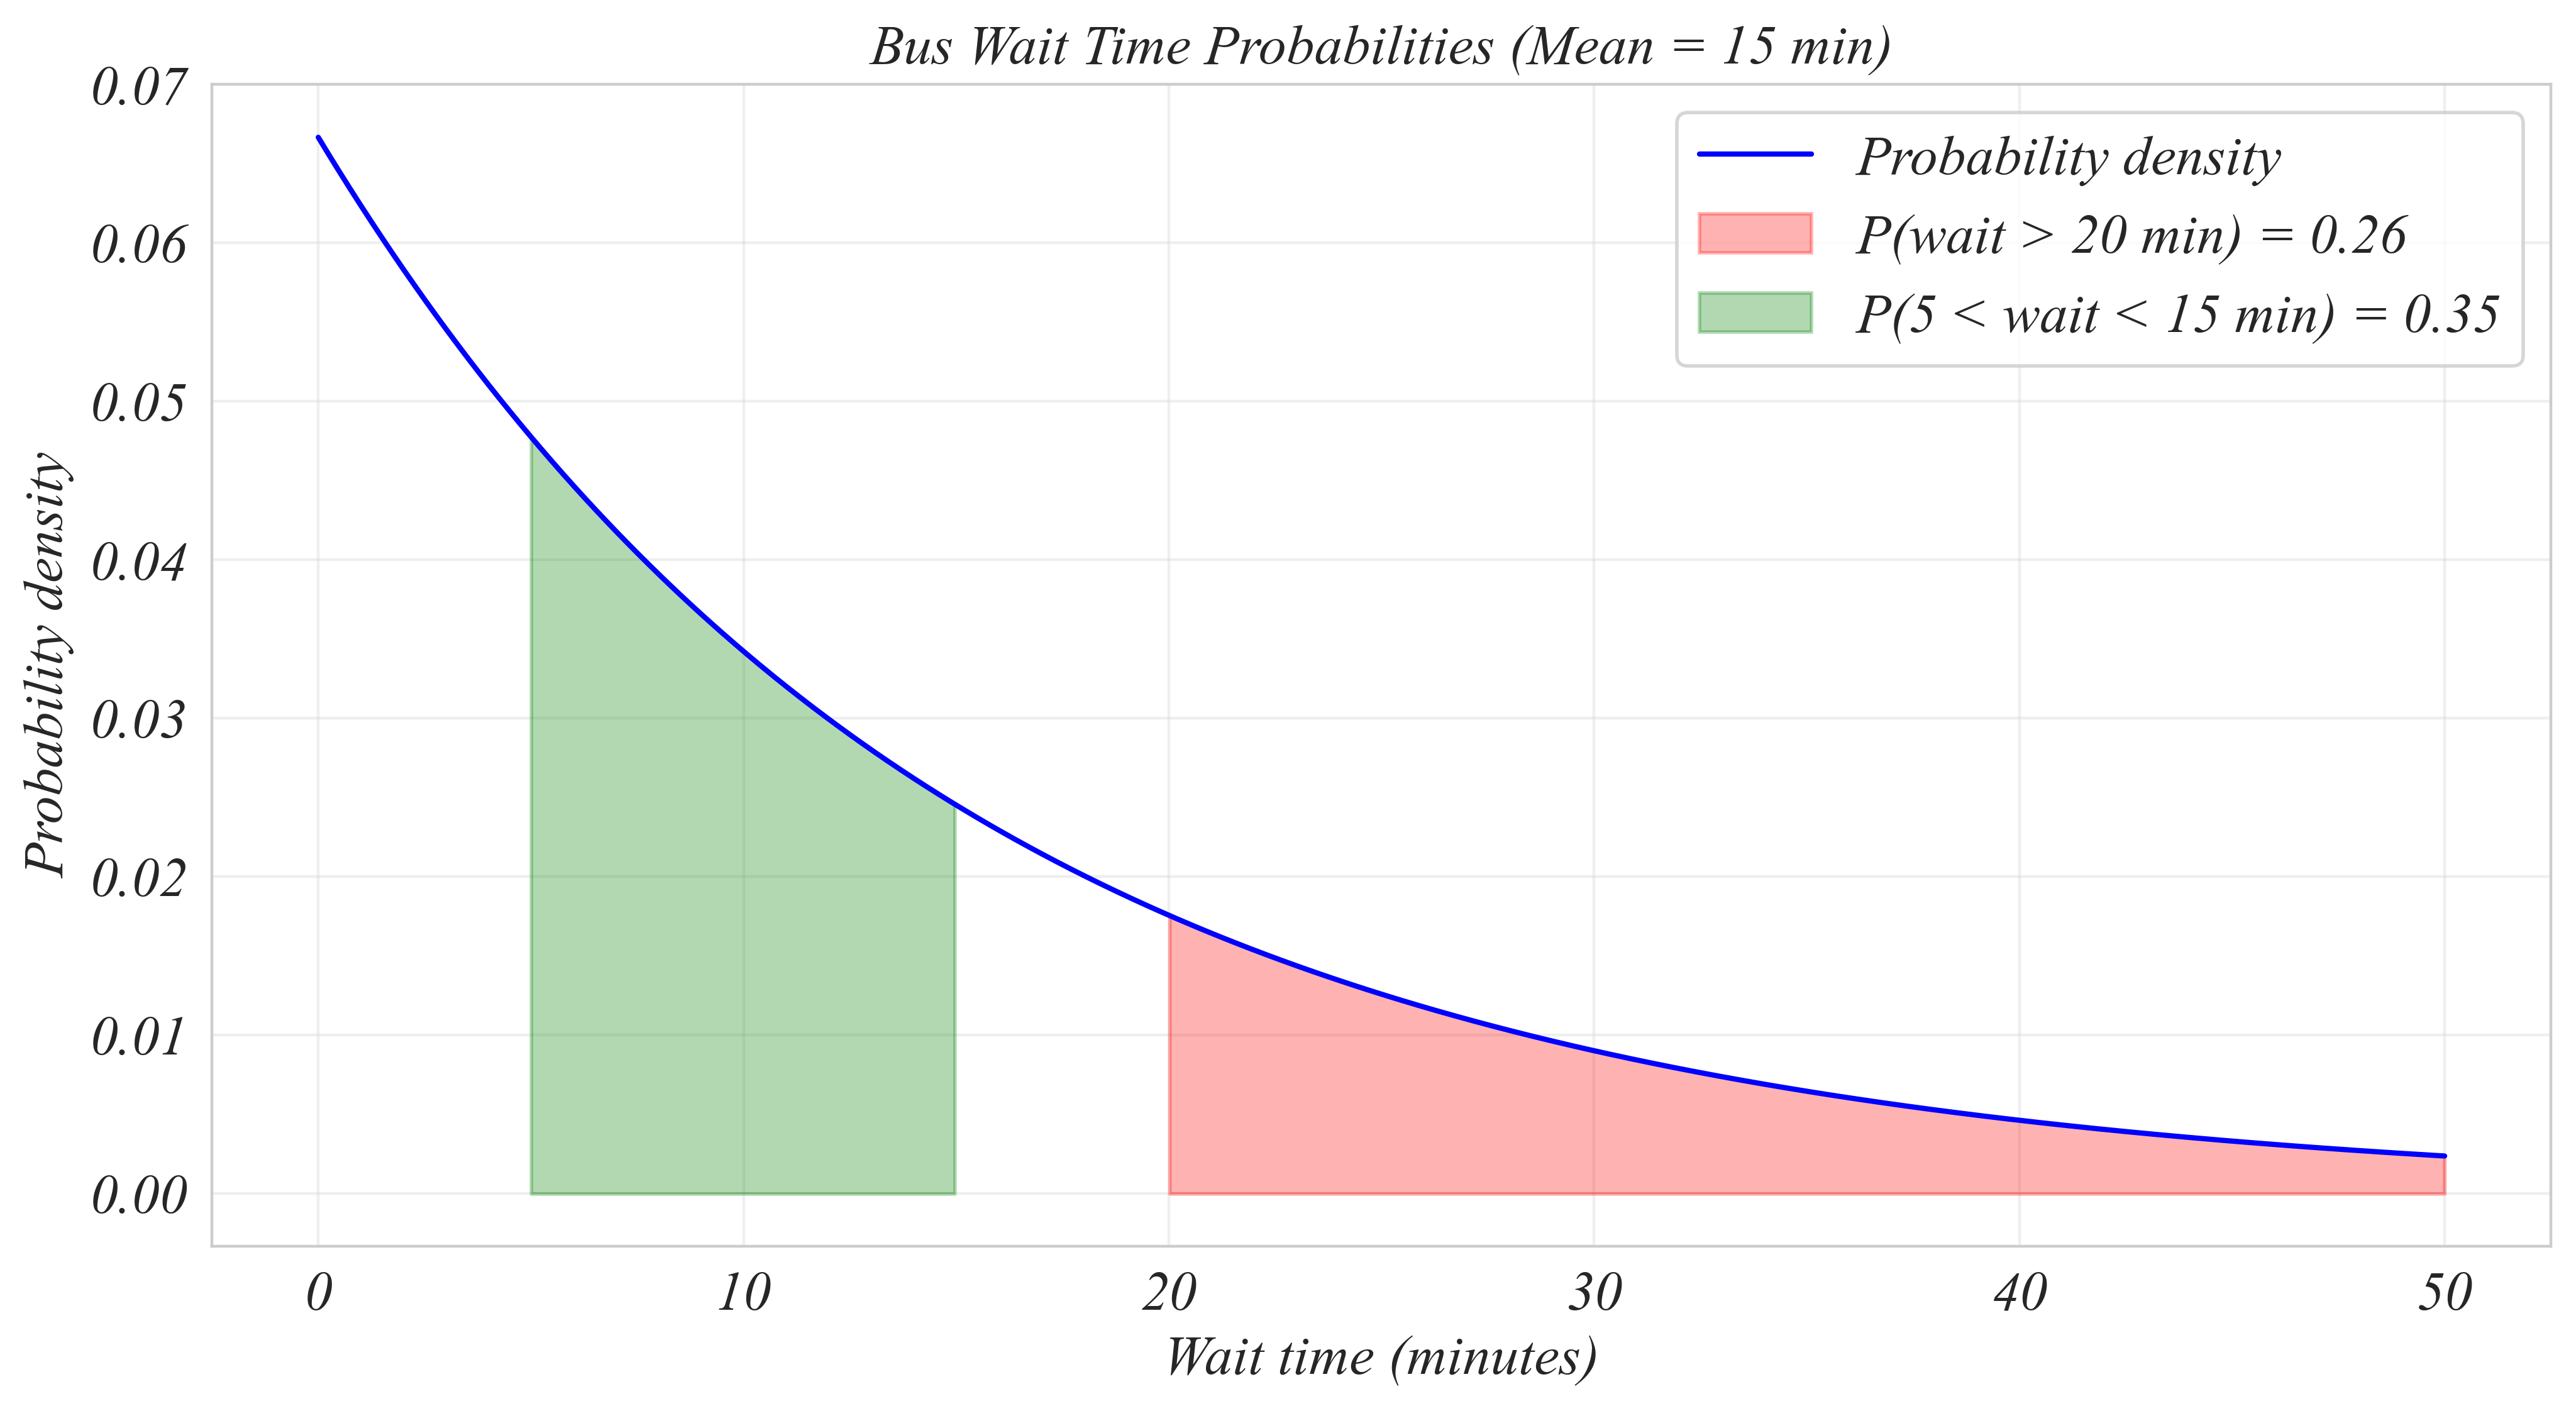

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
mean_time = 15  # mean time between buses in minutes
x = np.linspace(0, 50, 1000)  # x-axis points for plotting
y = stats.expon.pdf(x, scale=mean_time)  # exponential pdf

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the full exponential curve
plt.plot(x, y, 'b-', label='Probability density')

# Shade area for P(wait > 20)
x_tail = x[x >= 20]
y_tail = stats.expon.pdf(x_tail, scale=mean_time)
plt.fill_between(x_tail, y_tail, alpha=0.3, color='red', 
                 label='P(wait > 20 min) = {:.2f}'.format(
                     np.exp(-20/mean_time)))

# Shade area for P(5 < wait < 15)
x_middle = x[(x >= 5) & (x <= 15)]
y_middle = stats.expon.pdf(x_middle, scale=mean_time)
plt.fill_between(x_middle, y_middle, alpha=0.3, color='green',
                 label='P(5 < wait < 15 min) = {:.2f}'.format(
                     np.exp(-5/mean_time) - np.exp(-15/mean_time)))

plt.title('Bus Wait Time Probabilities (Mean = 15 min)')
plt.xlabel('Wait time (minutes)')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True, alpha=0.3)

# Print probabilities and expected wait time
print(f"Expected wait time: {mean_time/2:.1f} minutes")
print(f"P(wait > 20 min): {np.exp(-20/mean_time):.3f}")
print(f"P(5 < wait < 15 min): {np.exp(-5/mean_time) - np.exp(-15/mean_time):.3f}")

# Calculate probabilities for different wait times
wait_times = [5, 10, 15, 20, 30]
print("\nProbability of waiting more than:")
for t in wait_times:
    prob = np.exp(-t/mean_time)
    print(f"{t:2d} minutes: {prob:.3f}")

plt.savefig('Part_3_1/i/bus_wait_times.png')